# 1A.e - Enoncé 22 octobre 2019 (2)

Correction du second énoncé de l'examen du 22 octobre 2019. L'énoncé propose une façon de disposer des tables carrées dans une salle carrée.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

On sait d'après les dernières questions qu'il faudra tout répéter plusieurs fois. On prend le soin d'écrire chaque question dans une fonction. C'est un mariage dans une salle carrée. On veut disposer les tables de sortes qu'elles soient éloignées le plus possible les unes des autres et du bord de la salle. Les tables sont toutes carrées et toutes la même taille.

## Q1 - distance_table

Ecrire une fonction qui calcule la distance entre deux tables carrées dont on connaît le centre. Et comme ce sont des tables carrées, on considère que la distance entre deux tables est la plus grande des valeurs absolues des différences de coordonnées.

In [2]:
def distance_table(x1, y1, x2, y2):
    return max(abs(x1 - x2), abs(y1 - y2))

distance_table(0, 0, 2, 1)

2

## Q2 - distance_bord

Ecrire une fonction qui calcule la distance entre une table (son centre) et le bord de la salle de côté *2C*.

In [3]:
def distance_bord(x1, y1, C):
    dist = distance_table(x1, y1, 0, 0)
    return C - dist

distance_bord(1, 1, 5)

4

In [4]:
distance_bord(10, 1, 5)

-5

## Q3 - table_alea

Ecrire une fonction qui tire aléatoirement une table dans le carré de côté *2C*

In [5]:
import random

def table_alea(C):
    C2 = C ** 2
    dist = C2 * 2
    x = random.uniform(-C, C)
    y = random.uniform(-C, C)
    return x, y

table_alea(5)

(-4.908190224838399, 2.7798369055014547)

## Q4 - n_table_alea

Ecrire une fonction qui tire aléatoirement *N* tables dans le carré de côté *2C*.

In [6]:
def n_table_alea(N, C):
    return [table_alea(C) for n in range(N)]

n_table_alea(3, 5)

[(-0.6047310701361788, -4.538160002945912),
 (2.7983390011407794, 2.6871544213644984),
 (1.4887075948495667, -4.511831256978005)]

## Q5 - table_proches

Ecrire une fonction qui retourne la table la plus proche d'une table ou du bord. La fonction doit retourner l'indice de la table la plus proche ou -1 si c'est le bord, puis la distance associée. On ajoute un paramètre *skip_i* pour éviter une table.

In [7]:
def table_proches(x1, y1, list_tables, C, skip_i):
    proche = -1
    best = distance_bord(x1, y1, C)
    for i, table in enumerate(list_tables):
        if i == skip_i:
            continue
        dist = distance_table(x1, y1, table[0], table[1])
        if dist < best:
            best = dist
            proche = i
    return proche, best

C = 5
list_tables = n_table_alea(3, C)
table_proches(1, 1, list_tables, C, None)

(0, 3.1962115931817596)

In [8]:
table_proches(C * 0.9, 0, list_tables, C, None)

(-1, 0.5)

## Q6 - distance_n_tables_alea

Ecrire une fonction qui tire *N* tables aléatoirement et qui retourne la distance minimum entre deux tables ou le mur et les tables.

In [9]:
def distance_n_tables_alea(N, C):
    distrib = n_table_alea(N, C)
    best = C ** 2
    for i, table in enumerate(distrib):
        proche, dist = table_proches(table[0], table[1], distrib, C, skip_i=i)
        if dist < best:
            best = dist
    return best, distrib

distance_n_tables_alea(3, C)

(0.6710676955082597,
 [(-0.8642968594855169, 4.32893230449174),
  (1.500463237472049, -0.1547646758902923),
  (3.7606012466424747, 4.019429938832147)])

## Q7 - meilleur_table_alea

Ecrire une fonction qui tire *N* tables aléatoirement et qui retourne la distance minimum entre deux tables ou le mur et les tables.

In [10]:
def meilleur_table_alea(k, N, C):
    dist = 0
    best = None
    for i in range(k):
        d, distrib = distance_n_tables_alea(N, C)
        if d > dist:
            best = distrib
            dist = d
    return best, dist

meilleur_table_alea(10, 3, C)

([(-3.6514056477386534, 1.596586600954664),
  (0.05123812953078399, 0.05320587377518926),
  (0.37467460315675805, -2.4937702081221422)],
 1.3485943522613466)

## Q8 - résultat numérique

Ecrire une fonction qui retourne le résultat pour 11 tables et une salle de demi-côté 1.

In [11]:
best, dist = meilleur_table_alea(10, 11, 1)
best, dist

([(-0.6259118658008394, -0.1764558984440392),
  (0.6004143527243244, -0.4008125902558497),
  (-0.052940751769248395, 0.547095264138868),
  (0.7525281574947777, 0.6243952889602158),
  (-0.2784959002399452, -0.16893417347025785),
  (0.15965080092875694, 0.5866949933059173),
  (-0.6062900542195173, -0.43564615941411566),
  (0.26135901810381923, -0.2792244176019283),
  (0.7961649730497629, -0.28673576049151195),
  (0.08784118387851514, 0.2840288333247212),
  (0.7893555701617381, -0.6299236074366998)],
 0.19575062032543844)

## Q9 - plot_tables

Ecrire une fonction qui représente la solution avec matplotlib en partant de l'exemple donnée.

In [12]:
%matplotlib inline

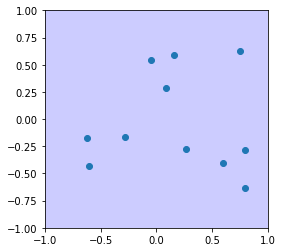

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
C = 1
ax.set_xlim([-C, C])
ax.set_ylim([-C, C])
c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax.add_artist(c)
ax.plot([b[0] for b in best], [b[1] for b in best], 'o');

## Q10 ...

Il est difficile de tomber sur une bonne répartition de tables en partant du hasard et plus il y aura de tables, plus il faudra de tirages. Il est plus simple de partir d'un tirage puis d'éloigner les deux tables les plus proches. L'éloigner de combien, c'est une autre question. C'est la première option. La seconde est de positionner les tables selon un quadrillage rectangulaire en formant une spirale et de chercher le meilleur écartement.

Pour la première option, on peut soit écarter une paire de table, soit écarter une table de ses voisins les plus proches, voisins trouvés grâce à un diagramme de Voronoï. La première variante ne marche pas très bien.

In [14]:
import numpy

def improve_distrib(iter, tables, C, alpha=0.2):
    
    for it in range(iter):
        
        # On cherche la pair la plus proche.
        best = C ** 2
        pair = None
        for i, table in enumerate(tables):
            proche, dist = table_proches(table[0], table[1], tables, C, skip_i=i)
            if dist < best:
                best = dist
                pair = i, proche
        
        if it % 50 == 0:
            print(it, "paire", pair, "distance", best)

        # On choisit une table.
        if pair[0] == -1:
            i = 1
        elif pair[1] == -1:
            i = 0
        else:
            i = numpy.random.randint(0, 1)
        
        pi = pair[i]
        if pair[1-i] == -1:
            pjp = (0, 0)
            sign = 1
        else:
            pjp = tables[pair[1-i]]
            sign = -1
        
        # On calcule le vecteur entre les deux tables.
        dx, dy = (pjp[0] - tables[pi][0],
                  pjp[1] - tables[pi][1])
        
        # Un peu d'aléa.
        h = numpy.random.uniform(0, alpha)
        dx *= h * sign
        dy *= h * sign
        
        # On bouge la table.
        table = tables[pi]
        tables[pi] = (table[0] + dx, table[1] + dy)
        if distance_bord(tables[pi][0], tables[pi][1], C) < 0:
            # Table hors du cercle
            tables[pi] = (table[0] - dx, table[1] - dy)


C = 1
best_sol, dist = meilleur_table_alea(10, 11, C)
improve_distrib(200, best_sol, C, alpha=0.5)

0 paire (9, -1) distance 0.07797442236028274
50 paire (0, 9) distance 0.17084871553555847
100 paire (0, 1) distance 0.16055223380264586
150 paire (0, 1) distance 0.22481137276979984


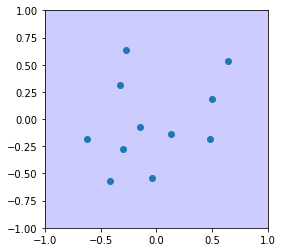

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
C = 1
ax.set_xlim([-C, C])
ax.set_ylim([-C, C])
c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax.add_artist(c)
ax.plot([b[0] for b in best_sol], [b[1] for b in best_sol], 'o');

## Q10 - Voronoï

In [16]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = numpy.array(best_sol)
vor = Voronoi(points)

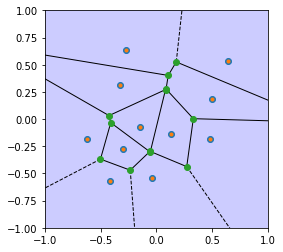

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
C = 1
c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax.add_artist(c)
ax.plot([b[0] for b in best_sol], [b[1] for b in best_sol], 'o')
voronoi_plot_2d(vor, ax=ax)
ax.set_xlim([-C, C])
ax.set_ylim([-C, C]);

On ajoute le bord.

In [18]:
bords = []
for i in range(-5, 6):
    bords.append((C, C * i / 5))
    bords.append((-C, C * i / 5))
    bords.append((C * i / 5, -C))
    bords.append((C * i / 5, C))
points2 = numpy.vstack([points, bords])

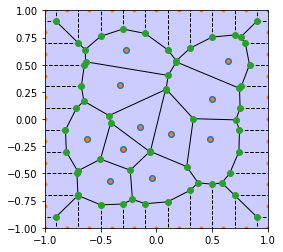

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
C = 1
c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax.add_artist(c)
ax.plot([b[0] for b in best_sol], [b[1] for b in best_sol], 'o')
vor2 = Voronoi(points2)
voronoi_plot_2d(vor2, ax=ax)
ax.set_xlim([-C, C])
ax.set_ylim([-C, C]);

Le diagramme de Voronoï permet de construire un voisinage de points pour qu'on peut rapprocher le plus possible d'en ensemble de triangle équilatéraux ou rapprocher une table le plus possible de sa frontière la plus éloignée. Après quelques essais, je ne peux pas que ce fut là la meilleure inspiration.

## Q10 - KMeans

Une autre idée consiste à recouvrir la salle de points puis à effectuer un [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) pour créer artificiellement des zones.

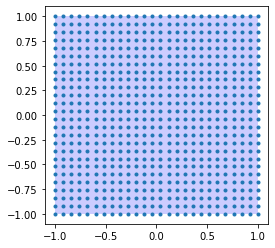

In [20]:
def points_in_rectangle(N, R):
    points = numpy.empty(((N+1)**2, 2))    
    pos = 0
    for i in range(0, N + 1):
        for j in range(0, N + 1):
            points[pos, 0] = 1.0 * i / N * R * 2 - R
            points[pos, 1] = 1.0 * j / N * R * 2 - R
            pos += 1
    return points

R = 1
points = points_in_rectangle(25, R)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax.add_artist(c)
ax.plot(points[:, 0], points[:, 1], '.');

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=11)
km.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
pred = km.predict(points)

Les centres des clusters sont les emplacements des tables cherchées.

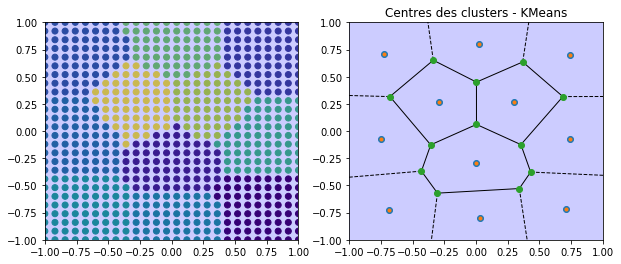

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax[0].add_artist(c)
ax[0].set_xlim([-R, R])
ax[0].set_ylim([-R, R])
ax[0].scatter(points[:, 0], points[:, 1], c=pred)

c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax[1].add_artist(c)
ax[1].set_xlim([-R, R])
ax[1].set_ylim([-R, R])
ax[1].plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 'o')
vor2 = Voronoi(km.cluster_centers_)
voronoi_plot_2d(vor2, ax=ax[1])
ax[1].set_title("Centres des clusters - KMeans")
ax[1].set_xlim([-R, R])
ax[1].set_ylim([-R, R]);

In [24]:
def distance_n_tables(distrib, R):
    best = R ** 2
    for i, table in enumerate(distrib):
        proche, dist = table_proches(table[0], table[1], distrib, R, skip_i=i)
        if dist < best:
            best = dist
    return best

distance_n_tables(km.cluster_centers_, 1), distance_n_tables(best_sol, 1)

(0.19622641509433936, 0.2016527778991591)

On essaye avec un mélange de lois normales.

In [25]:
from sklearn.mixture import GaussianMixture
gau = GaussianMixture(11)
gau.fit(points)
pred = gau.predict(points)

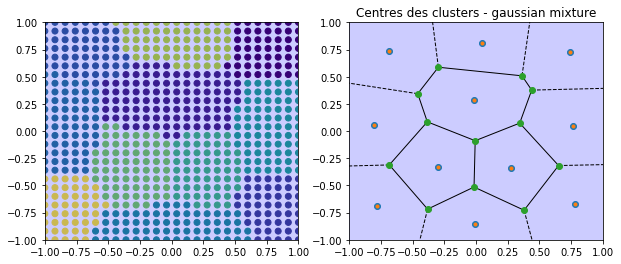

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax[0].add_artist(c)
ax[0].set_xlim([-R, R])
ax[0].set_ylim([-R, R])
ax[0].scatter(points[:, 0], points[:, 1], c=pred)

c = Rectangle((-1, -1), 2, 2, alpha=0.2, fill=True, facecolor='blue')
ax[1].add_artist(c)
ax[1].set_xlim([-R, R])
ax[1].set_ylim([-R, R])
ax[1].plot(gau.means_[:, 0], gau.means_[:, 1], 'o')
vor2 = Voronoi(gau.means_)
voronoi_plot_2d(vor2, ax=ax[1])
ax[1].set_title("Centres des clusters - gaussian mixture")
ax[1].set_xlim([-R, R])
ax[1].set_ylim([-R, R]);

In [27]:
distance_n_tables(km.cluster_centers_, 1), distance_n_tables(gau.means_, 1)

(0.19622641509433936, 0.14695957901204992)

Les résultats sont trompeurs car les centres sont un peu trop près du bord. Il faudra enlever des points sur le bord.